# Aula 5 - KNN - outra abordagem

<img src="images/knn_intuição.png"  style="width: 700px" />

### Funcionamento do KNN
<img src="images/algoritmo_passo_a_passo.png"  style="width: 700px" />


Fonte: https://cambridgecoding.wordpress.com/

### 2D

<img src="images/knn_regressão_x_classificação.png"  style="width: 700px" />

<br>

Fonte: https://realpython.com/knn-python/

## Medidas de distância

<img src="images/9_distance_metrics.png" width="600px" text="https://towardsdatascience.com/9-distance-measures-in-data-science-918109d069fa">

### Distância euclidiana
$$ D(x,y) = \sqrt{\sum_{i=1}^{n}{(x_i - y_i)^2}}$$
__Vantagens:__
- Muito fácil de entender e aplicar
- É a menor distância entre dois pontos em um plano cartesiano
- Tem resultados muito bons em dados com baixa dimensionalidade e quando a magnitude do vetor é importante

__Desvantagens:__
- Não é invariante à escala (as distâncias computadas podem estar skewed dependendo das unidades das features - solução: normalizar os dados)
- Quanto maior a dimensionalidade dos seus dados, menos útil é essa distância (devido à Maldição da Dimensionalidade)
- Não é recomendada quando o dataset possui atributos discretos e/ou binários

### Distância de Manhattan 
$$ D(x,y) = \sum_{i=1}^{n}{|x_i - y_i|}$$
__Vantagens:__
- Utilizada quando podemos apenas se mover em ângulos de 90º como em um tabuleiro de xadrez ou uma cidade. Nesse caso, não há movimentação na diagonal
- Não sofre com a maldição da dimensionalidade
- Quando o dataset possui atributos discretos e/ou binários

__Desvantagens:__
- É menos intuitiva, principalmente em grandes dimensões
- Fornece distâncias maiores que a Euclidiana (não necessariamente ruim)

### Distância de Minkowski
$$ D(x,y) = \begin{pmatrix}\sum_{i=1}^{n}{|x_i - y_i|^p}\end{pmatrix}^{1/p}$$

- p=1 — Distância de Manhattan
- p=2 — Distância euclidiana
- p=∞ — Distância de Chebyshev

## Maldição da Dimensionalidade
<img src="images/The-effect-of-the-curse-of-dimensionality-when-projected-in-1-one-dimension-2-two.png" width="600px" text="www.researchgate.net/figure/The-effect-of-the-curse-of-dimensionality-when-projected-in-1-one-dimension-2-two_fig3_342638066">

## Normalização / Padronização / Escalas
Importante normalizar para que os dados fiquem sempre na mesma escala
* Evita que certos algoritmos entendam que determinados atributos tenham mais pesos e sejam considerados mais importantes que outros
* Facilita cálculos internos de determinados algoritmos como redes neurais

<img src="images/normalization.png"  style="width: 400px" />

* Normalização/Standarization

1. Min-Max: $$y = (x – min) / (max – min)$$
2. Standarization: escalar valores de forma que a média seja igual a zero e o desvio padrão igual a 1, seguindo uma distribuição normal
$$y = (x – mean) / standard\_deviation$$
3. RobustScaler: remove outliers seguindo os quartis dos dados e aplica os métodos 1 ou 2 posteriormente <br> <br>

OBS 1: $x - mean$ é chamado também de centralização <br>
OBS 2: $x/standard\_deviation$ também é chamado de escala <br>
OBS 3: esses métodos devem ser aplicados no dataset de *treinamento* e replicados no teste e validação. Chama-se aplicar a normalização de "fit" e replicar seus resultados em outras bases de "transform". <br>

É considerado **ERRADO** aplicar das formas abaixo: <br>
- Normalizar antes de particionar o dataset, aplicando-se a normalização em todos os dados disponíveis <br>
- Normalizar treino e teste ao invés de aplicar no teste a normalização realizada no treino <br>

## Pipeline

[Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) é uma classe do sklearn que permite aplicar uma sequência de transformações em um estimador final. <br>
Para isso, os passos intermediários devem ter implementados métodos de `fit` e `transform` enquanto o estimador final só precisa ter o `fit` implementado. <br>
O propósito do `pipeline` é:
- reunir várias etapas para serem validadas de forma cruzada (cross-validation) ao definir parâmetros diferentes
- ajudar a criar códigos que possuam um padrão que possa ser facilmente entendido e compartilhando entre times de cientista e engenheiro de dados.

<img src="images/pipeline.png" text="https://nbviewer.org/github/rasbt/python-machine-learning-book/blob/master/code/ch06/ch06.ipynb#Combining-transformers-and-estimators-in-a-pipeline">


# Validação Cruzada


### 1) Estratégia "Holdout set": Conjuntos de treino, validação e teste
Como vimos, no aprendizado de máquina nós temos alguns dados (__conjunto de treino__), e depois fazemos um experimento com uma amostra de dados que nunca vimos (__conjunto de teste__) para saber o quão bem o modelo consegue generalizar.

Assim, temos o erro dentro do conjunto de treino, $E_{in}$, e o erro de generalização, pra dados daquele tipo fora desse conjunto, $E_{out}$. 
<br><br>

<div>
    <img src="images/treino_teste.png" width=500>
</div>

O problema é que, __se usarmos o conjunto de teste de qualquer forma para aprendizado, o erro que obtivermos nele deixa de refletir o erro de generalização__. 

Por exemplo, se treinarmos 3 modelos, e compararmos eles usando o conjunto de teste, o erro no teste não reflete mais o $E_{out}$.

Outro exemplo são certas transformações dos nossos dados. Imagina que pegamos nossos dados, "normalizamos" eles (ou seja, pegamos nossas features e transformamos elas de forma que tenham um range de 0 a 1), e então fazemos a divisão entre conjunto de treino e conjunto de teste. Nesse caso, você já usou o conjunto de teste para "aprender" algo (para normalizar, a gente usa o maior valor da feature na tabela). Logo, sua medida de $E_{out}$ não vale mais. 
O que fazer então? Nós usamos o __conjunto de validação__ (ou _hold-out set_).
<br><br>
<div>
    <img src="images/treino_validacao.png" width=500>
</div>

Ao separar uma amostra (conjunto de validação), e usá-la apenas para seleção de modelos, nós assumimos que esse uso não afeta muito o erro. Então vamos dizer que o erro de validação, $E_{val}$, __aproxima de certa forma o erro de generalização__.

<img src="images/cv.png" width=500 text="https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch06/ch06.ipynb">


Isso foi o que fizemos nas últimas aulas.

Após validar e escolher o modelo, nós queremos sempre seguir adiante com o melhor modelo possível. Assim, para melhorar o modelo, nós aumentamos o número de dados para treinar o modelo final.

Então aí sim, nós juntamos treino, validação e teste em uma única base, e treinamos o modelo final. Entende-se que os erros do nosso algoritmo só tendem a diminuir, quando fazemos isso.

###  2) Leave One Out Cross Validation (LOOCV)

Nós usamos, até agora, a estratégia de "hold-out set" (ou de conjunto de validação) para podermos comparar modelos.

Porém, ela tem algumas fraquezas. Especificamente, a gente precisa de dados suficientes no conjunto de validação para tentar aproximar melhor o erro de generalização. Mas isso faz com que tenhamos cada vez menos dados de treino, para treinar o melhor modelo possível!

Será que teria alguma forma de garantirmos uma boa validação, mas ainda tendo o máximo possível de dados pra treino? 

A resposta é __sim__. Entra em cena o __Leave One Out Cross Validation (LOOCV)__.
<br><br>
<div>
    <img src="images/LOOCV.png" width=600>
</div>
<br>

Ele funciona assim:
- Nós tiramos 1 ponto dos dados de treino
- Treinamos o modelo nos outros N-1 pontos
- Avaliamos o modelo naquele ponto que tiramos
- Repete esse procedimento para _todos_ os pontos da base de treino 

Embora o Scikit-Learn tenha ferramentas para usarmos o LOOCV, raramente esse método é aplicado na prática. O motivo disso é que ele é __muito custoso computacionalmente__, e esse custo aumenta cada vez mais quanto mais dados de treino tivermos.

Além disso, em termos de acurácia o LOO geralmente resulta em uma maior variância. Dado que os folds construídos são basicamente identicos uns aos outros (e idêntinco ao dataset original), não há diferença significativa entre os modelos criados em cada iteração.

Nós não vamos testar esse método devido à esses motivos e vamos focar no seu primo mais útil: a validação cruzada.

[Documentação do sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html#sklearn.model_selection.LeaveOneOut)

O __Cross Validation (CV)__ (ou validação cruzada, em português) é uma técnica muito utilizada para estimar o erro de generalização do modelo. Ele é semelhante ao LOOCV, mas invés de separarmos apenas 1 ponto de cada vez, nós separamos um __bloco de pontos__.

Com ela podemos testar a capacidade de generalização de um modelo. A técnica faz divisões na base de dados de treino e teste e permite treinar e validar seus dados em diversos grupos distintos. Dessa forma, conseguimos mensurar a flexibilidade ou capacidade de generalização de um modelo antes mesmo da chegada de novos dados.

<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width=600>

Vamos discutir o passo a passo do que está acontecendo:
- Como sempre, primeiro temos que garantir que a validação não aconteça usando a base de teste.
- A gente separa a nossa base de treino em diversas partes (o mais comum são 3, 5 ou 10).
- Cada parte vai ser usada 1 vez como base de validação, para um treino realizado nas outras partes. (Na figura, por exemplo, temos 5 rodadas, e em cada rodada um bloco diferente é usado como validação, enquanto os outros 4 são usados para treino).
- Calculamos as métricas de avaliação em cada uma dessas rodadas, para a base de validação.
- Por fim, temos como resultado o score médio para o nosso modelo (tirando a média das métricas para cada parte usada como validação), ou seja, o quão bom ele está generalizando.

<br>

No sklearn podemos criar esses _folds_ utilizando os médotos [__K-Fold__](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) e [__Stratified K-Fold__](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html?highlight=stratifiedkfold#sklearn.model_selection.StratifiedKFold). Eles irão retornar os indices dos arrays de dados de acordo com o número de partições escolhidas.

A diferença entre amobos é semelhante ao que discutimos sobre usar ou não o parâmetro "stratify" da função "train_test_split". O __K-Fold__ faz uma quebra sem se preocupar com a distribuição das classes, enquanto o __Stratified K-Fold__ garante a mesma proporção em todos os _folds_.

A gente pode usar o _stratified k-fold_ para quaisquer problemas que quisermos, embora o mais comum seja ele ser usado quando as nossas classes _target_ são muito __desbalanceadas__. Se uma das classes aparece muito menos que a outra, é possível que tenhamos uma quebra muito ruim. Em casos extremos, se uma classe aparece muito pouco, é possível que, sem a estratificação, ela sequer apareça em alguns _folds_.

<br><br>

# GridSearch

É o nosso método extensivo e de força bruta. Escolhemos os valores que queremos testar para nossos hiperparâmetros e testamos todas as escolhas possíveis. Essa estratégia vai ser __MUITO__ custosa computacionalmente e tende a demorar bastante.

<center><img src="https://www.researchgate.net/profile/Karl-Ezra-Pilario/publication/341691661/figure/fig2/AS:896464364507139@1590745168758/Comparison-between-a-grid-search-and-b-random-search-for-hyper-parameter-tuning-The.png" style="height: 350px"/></center>


O `scikit-learn` tem um função que pode nos ajudar nesse processo. Está dentro da parte de `model_selection` e se chama [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV), que utiliza o método de validação cruzada.

# Bias, Variance

<img src='https://www.researchgate.net/publication/335604816/figure/fig2/AS:799391489220609@1567601191401/Bias-variance-trade-off-in-machine-learning-This-figure-illustrates-the-trade-off.png'>

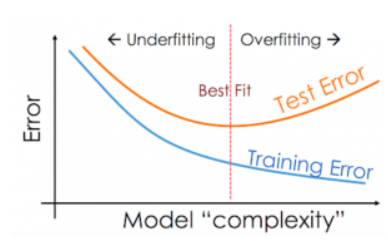